In [4]:
import pandas as pd 
import numpy as np 

%matplotlib inline
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates

import datetime

from mpl_finance import candlestick_ohlc


In [7]:
file_path = ("data/NIO.csv")

nio_df = pd.read_csv(file_path)

nio_df = nio_df.set_index('Date')

nio_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-09-12,6.000000,6.930000,5.350000,6.600000,6.600000,66849000
2018-09-13,6.620000,12.690000,6.520000,11.600000,11.600000,158346500
2018-09-14,12.660000,13.800000,9.220000,9.900000,9.900000,172473600
2018-09-17,9.610000,9.750000,8.500000,8.500000,8.500000,56323900
2018-09-18,8.730000,9.100000,7.670000,7.680000,7.680000,41827600
...,...,...,...,...,...,...
2021-10-19,40.270000,40.900002,39.560001,40.029999,40.029999,37820000
2021-10-20,39.970001,40.340000,39.160000,39.779999,39.779999,25120700
2021-10-21,39.509998,40.599998,39.369999,39.970001,39.970001,25389100


In [16]:
nio_df.index = pd.to_datetime(nio_df.index)

In [17]:
nio_df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

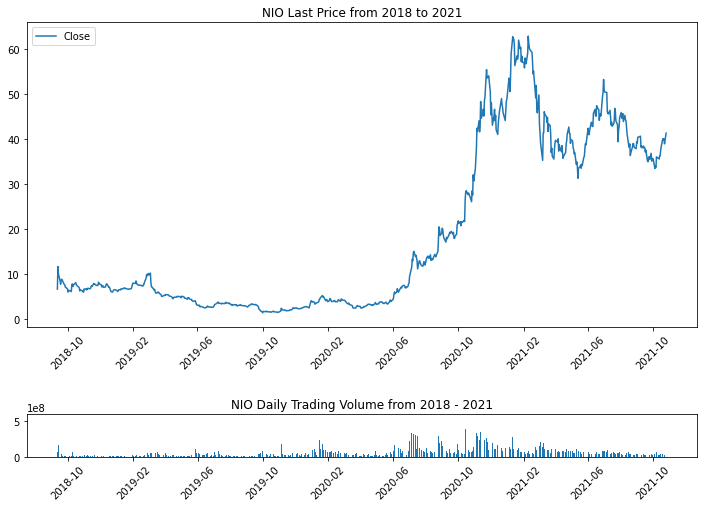

In [22]:
#Top plot consisting of daily closing prices 

top = plt.subplot2grid((4,4), (0,0), rowspan = 3, colspan = 4)
top.plot(nio_df.index, nio_df['Close'], label = "Close")

plt.title("NIO Last Price from 2018 to 2021")
plt.legend(loc = 2)
plt.xticks(rotation = 45)

top.xaxis.set_major_locator(mdates.MonthLocator(interval = 4))

formatter = mdates.DateFormatter('%Y-%m')
top.xaxis.set_major_formatter(formatter)


# Bottom plot consisting of daily trading volume 

bottom = plt.subplot2grid((4,4), (3,0), rowspan = 1, colspan = 4)
bottom.bar(nio_df.index, nio_df["Volume"])

plt.title("NIO Daily Trading Volume from 2018 - 2021")
plt.xticks(rotation = 45)

bottom.xaxis.set_major_locator(mdates.MonthLocator(interval = 4))
bottom.xaxis.set_major_formatter(formatter)

plt.gcf().set_size_inches(12, 8)

plt.subplots_adjust(hspace = 2.0)

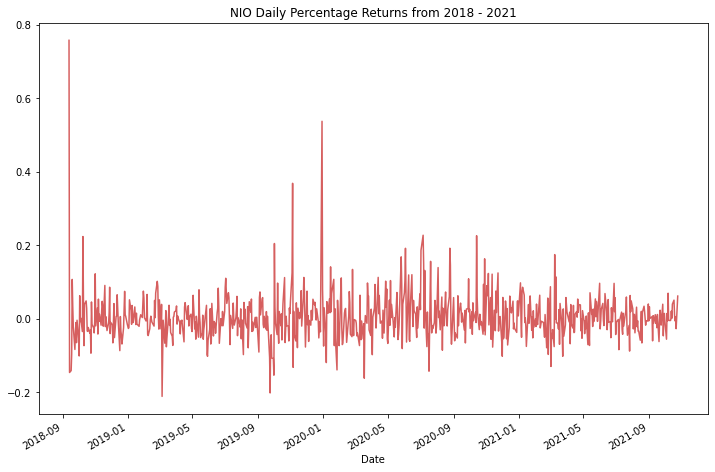

In [31]:
daily_changes = nio_df["Close"].pct_change(periods = 1)
daily_changes.plot(figsize = (12, 8), color = '#d65f5f', label = "Close");

plt.title("NIO Daily Percentage Returns from 2018 - 2021");

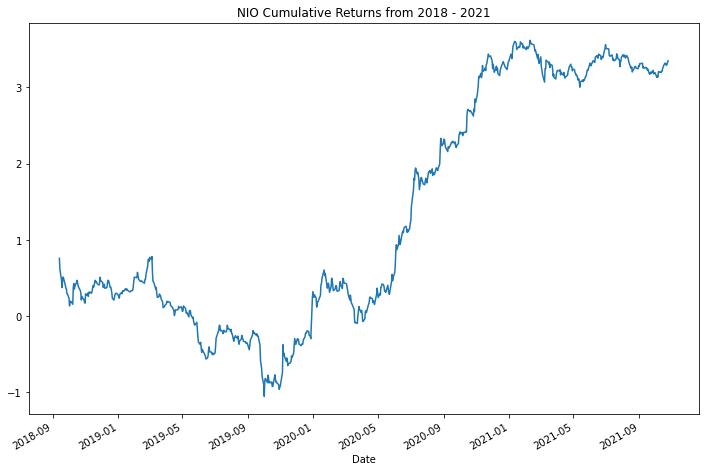

In [33]:
df_cumsum = daily_changes.cumsum()

df_cumsum.plot(figsize = (12, 8))
plt.title("NIO Cumulative Returns from 2018 - 2021");

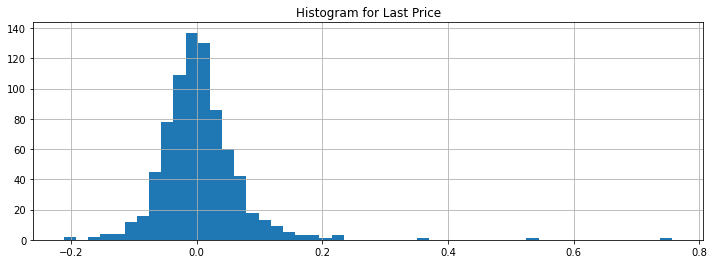

In [34]:
daily_changes.hist(bins = 50 , figsize = (12, 4))

plt.title("Histogram for Last Price");

In [35]:
daily_changes.describe()

count    785.000000
mean       0.004264
std        0.065197
min       -0.211614
25%       -0.029780
50%       -0.001709
75%        0.030456
max        0.757576
Name: Close, dtype: float64

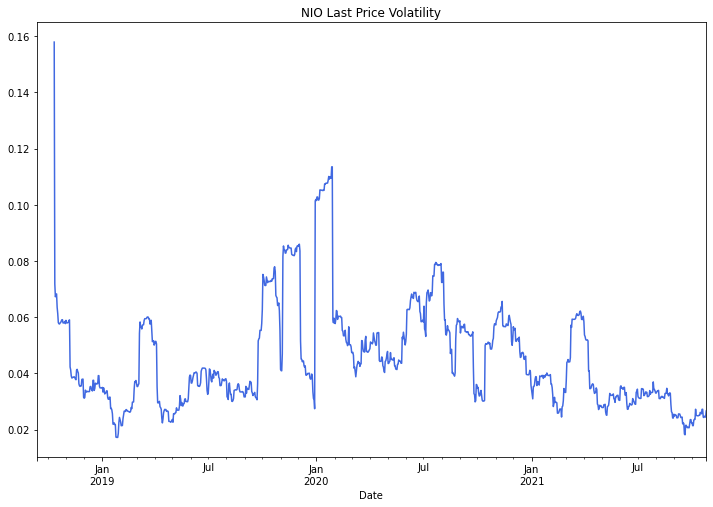

In [37]:
df_filled = nio_df['Close'].asfreq('D', method = 'ffill')
df_returns = df_filled.pct_change()
df_std = df_returns.rolling(window = 30).std()

df_std.plot(figsize = (12, 8), color = 'royalblue')

plt.title("NIO Last Price Volatility");

In [39]:

df_subset = nio_df[nio_df.index > '2021-01-01']
df_subset

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,51.200001,54.450001,50.669998,53.490002,53.490002,213109700
2021-01-05,51.970001,53.750000,50.400002,53.200001,53.200001,147474800
2021-01-06,54.020000,55.279999,49.080002,50.500000,50.500000,176397700
2021-01-07,53.049999,54.610001,52.349998,54.279999,54.279999,119429200
2021-01-08,57.759998,59.310001,55.880001,58.919998,58.919998,218512800
...,...,...,...,...,...,...
2021-10-19,40.270000,40.900002,39.560001,40.029999,40.029999,37820000
2021-10-20,39.970001,40.340000,39.160000,39.779999,39.779999,25120700
2021-10-21,39.509998,40.599998,39.369999,39.970001,39.970001,25389100


/Users/abdullahberakucuk/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


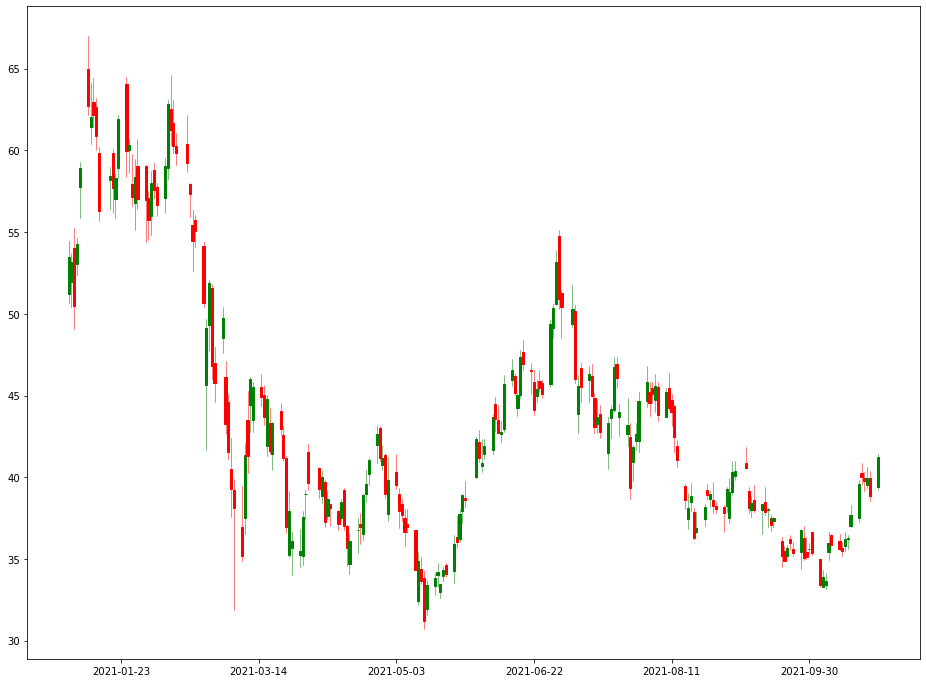

In [40]:
df_subset['Date'] = df_subset.index.map(mdates.date2num)

df_ohlc = df_subset[["Date", "Open", "High", "Low", "Close"]]

figure, ax = plt.subplots(figsize = (16, 12))
formatter = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(formatter)
candlestick_ohlc(ax,
                df_ohlc.values,
                width = 0.8,
                colorup = 'green',
                colordown = 'red')

plt.show()